### Notebook to generate the figure showing the LCTA fit on the MIRLIR data

In [1]:
using DataFrames
using RData
using CairoMakie

In [2]:
file_path = "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/R shenanigans/MIRLIR/MIRLIR_parameters.RData"

flexmix_parameters = RData.load(file_path)

Dict{String, Any} with 1 entry:
  "params" => [[0.0163973 0.0157844 0.0156924; -9.60103e-5 5.46659e-6 -9.91066e…

In [3]:
k1_matrix = flexmix_parameters["params"][1]
k5_matrix = flexmix_parameters["params"][2]
k6_matrix = flexmix_parameters["params"][3] 

5×3 Matrix{Float64}:
 0.577626      0.859955     0.849834
 0.052023      0.0042758    0.00975063
 0.000278308  -0.00016494  -0.00041157
 0.0220431     0.00936498   0.0
 0.0584429     0.0549397    0.0637257

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


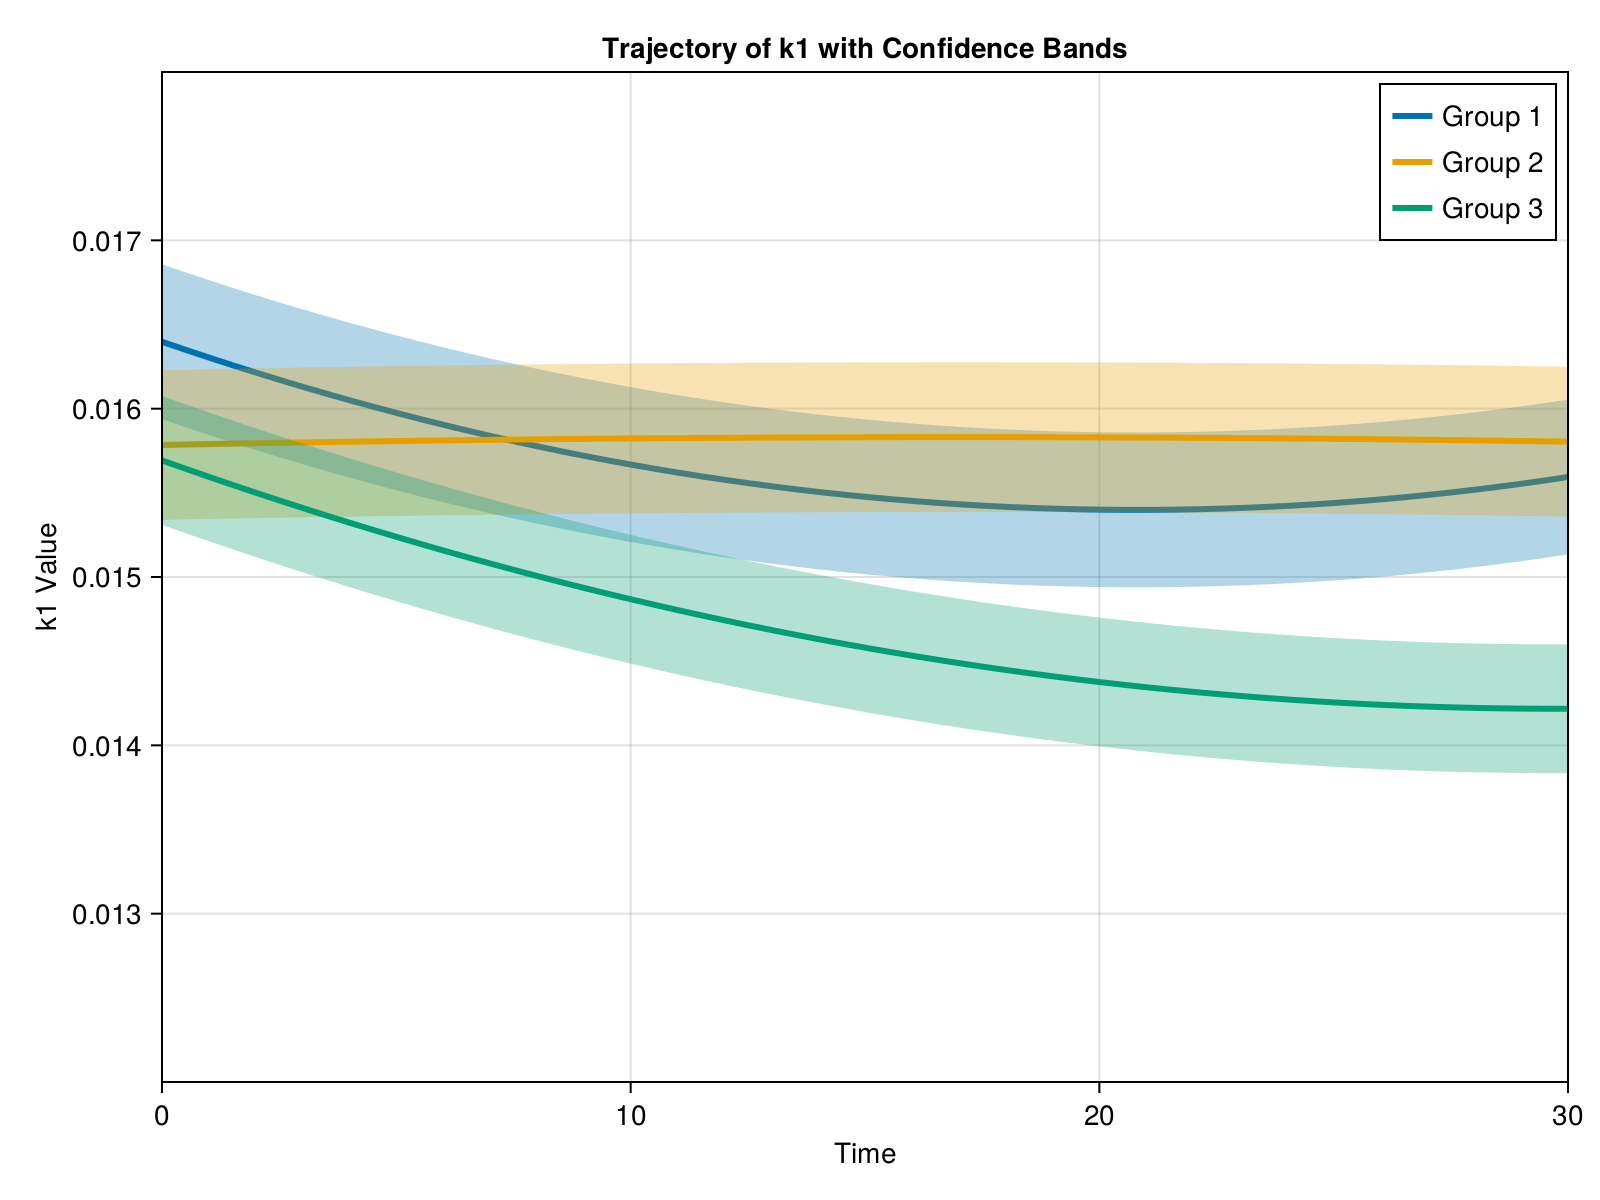

In [15]:
using CairoMakie

# Define time points
time_points = range(0, 100, length=200)

# Extract coefficients
intercepts = k1_matrix[1, :]
linear_coeffs = k1_matrix[2, :]
quadratic_coeffs = k1_matrix[3, :]
random_variances = k1_matrix[4, :]  # Assuming row 4 contains sigma2.Random
residual_variances = k1_matrix[5, :]  # Assuming row 5 contains sigma2.Residual

# Compute k1 trajectories and confidence intervals
k1_trajectories = []
upper_bounds = []
lower_bounds = []

for i in 1:3
    mean_traj = intercepts[i] .+ linear_coeffs[i] .* time_points .+ quadratic_coeffs[i] .* (time_points .^ 2)
    push!(k1_trajectories, mean_traj)

    # Compute total standard deviation
    sigma_total = sqrt(random_variances[i] + residual_variances[i])

    # Compute confidence bands (±2 std)
    push!(upper_bounds, mean_traj .+ 2 * sigma_total)
    push!(lower_bounds, mean_traj .- 2 * sigma_total)
end

# Define colors
colors = Makie.wong_colors()[1:3]

# Plot
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1], xlabel="Time", ylabel="k1 Value", title="Trajectory of k1 with Confidence Bands")

for i in 1:3
    band!(ax, time_points, lower_bounds[i], upper_bounds[i], color=(colors[i], 0.3))  # 30% opacity
    lines!(ax, time_points, k1_trajectories[i], color=colors[i], linewidth=3, label="Group $i")
end
ylims!(ax, 0.012, 0.018)
xlims!(ax, 0 , 30)
axislegend(ax)

fig


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


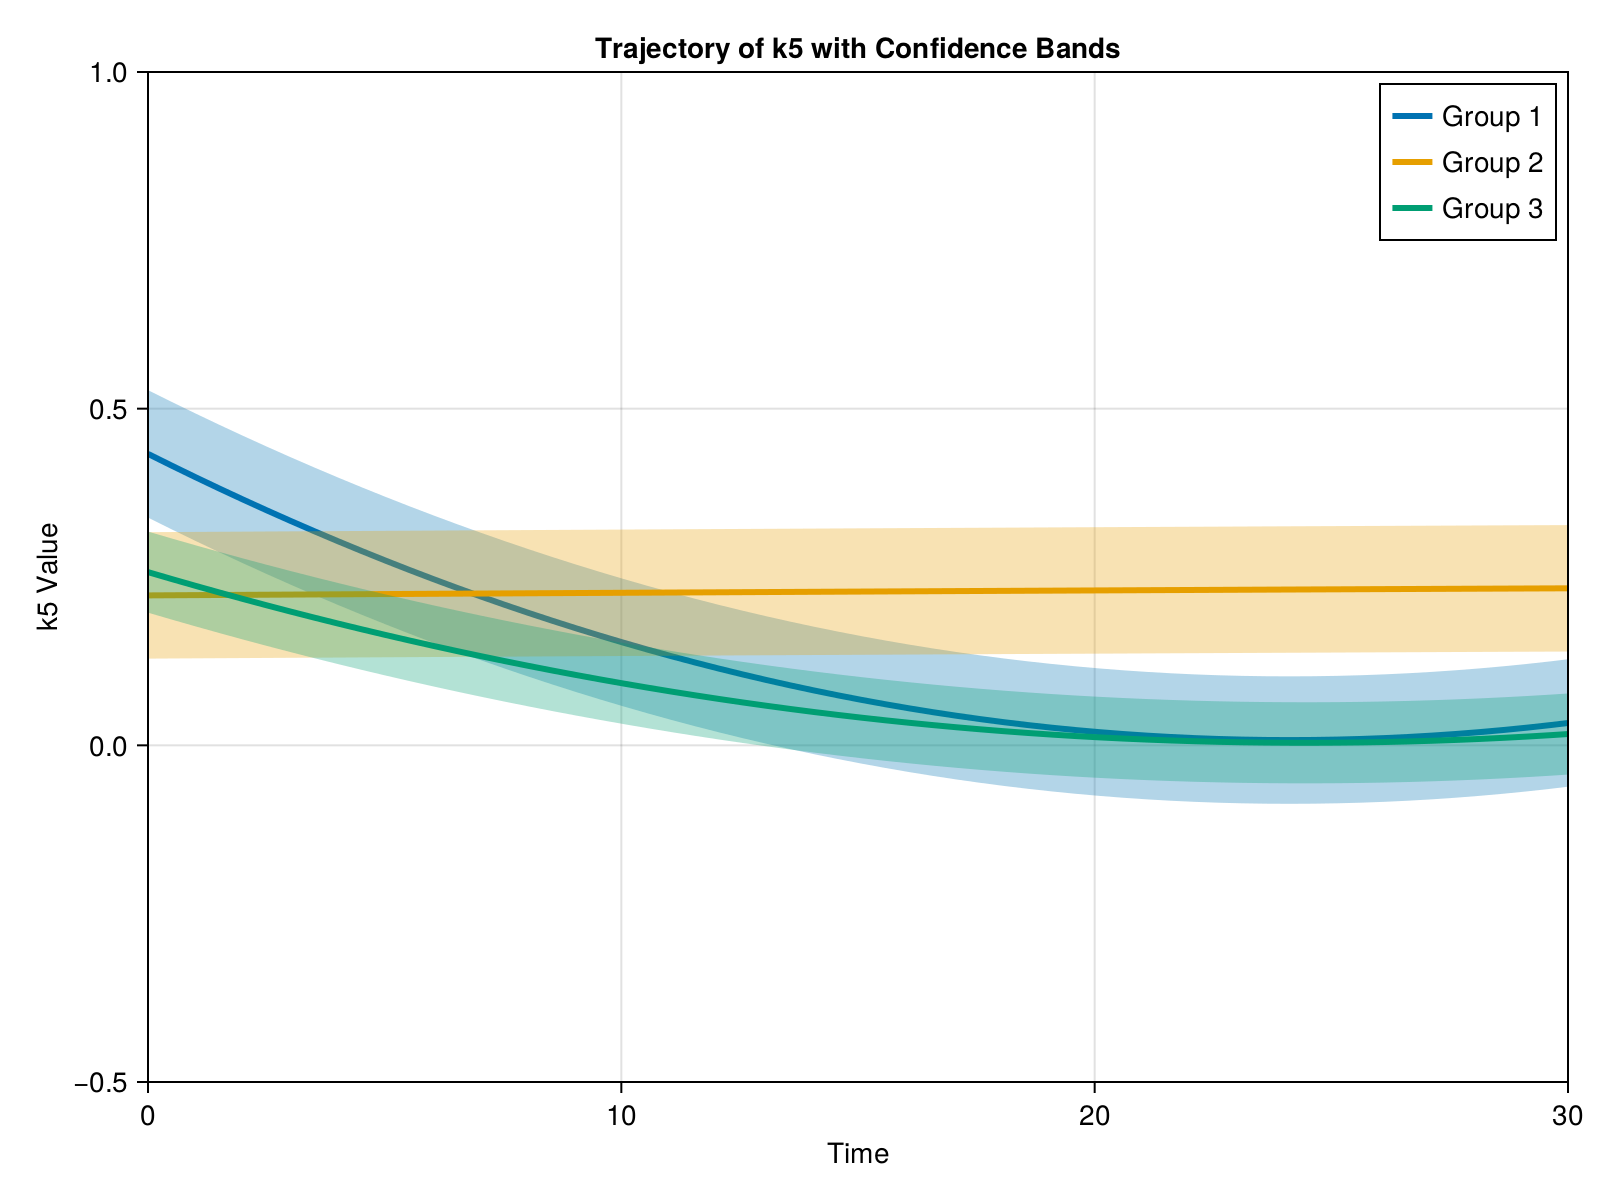

In [8]:
using CairoMakie

# Define time points
time_points = range(0, 100, length=200)

# Extract coefficients
intercepts = k5_matrix[1, :]
linear_coeffs = k5_matrix[2, :]
quadratic_coeffs = k5_matrix[3, :]
random_variances = k5_matrix[4, :]  # Assuming row 4 contains sigma2.Random
residual_variances = k5_matrix[5, :]  # Assuming row 5 contains sigma2.Residual

# Compute k5 trajectories and confidence intervals
k5_trajectories = []
upper_bounds = []
lower_bounds = []

for i in 1:3
    mean_traj = intercepts[i] .+ linear_coeffs[i] .* time_points .+ quadratic_coeffs[i] .* (time_points .^ 2)
    push!(k5_trajectories, mean_traj)

    # Compute total standard deviation
    sigma_total = sqrt(random_variances[i] + residual_variances[i])

    # Compute confidence bands (±2 std)
    push!(upper_bounds, mean_traj .+ 2 * sigma_total)
    push!(lower_bounds, mean_traj .- 2 * sigma_total)
end

# Define colors
colors = Makie.wong_colors()[1:3]

# Plot
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1], xlabel="Time", ylabel="k5 Value", title="Trajectory of k5 with Confidence Bands")

for i in 1:3
    band!(ax, time_points, lower_bounds[i], upper_bounds[i], color=(colors[i], 0.3))  # 30% opacity
    lines!(ax, time_points, k5_trajectories[i], color=colors[i], linewidth=3, label="Group $i")
end
ylims!(ax, -0.5, 1)
xlims!(ax, 0 , 30)
axislegend(ax)

fig


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


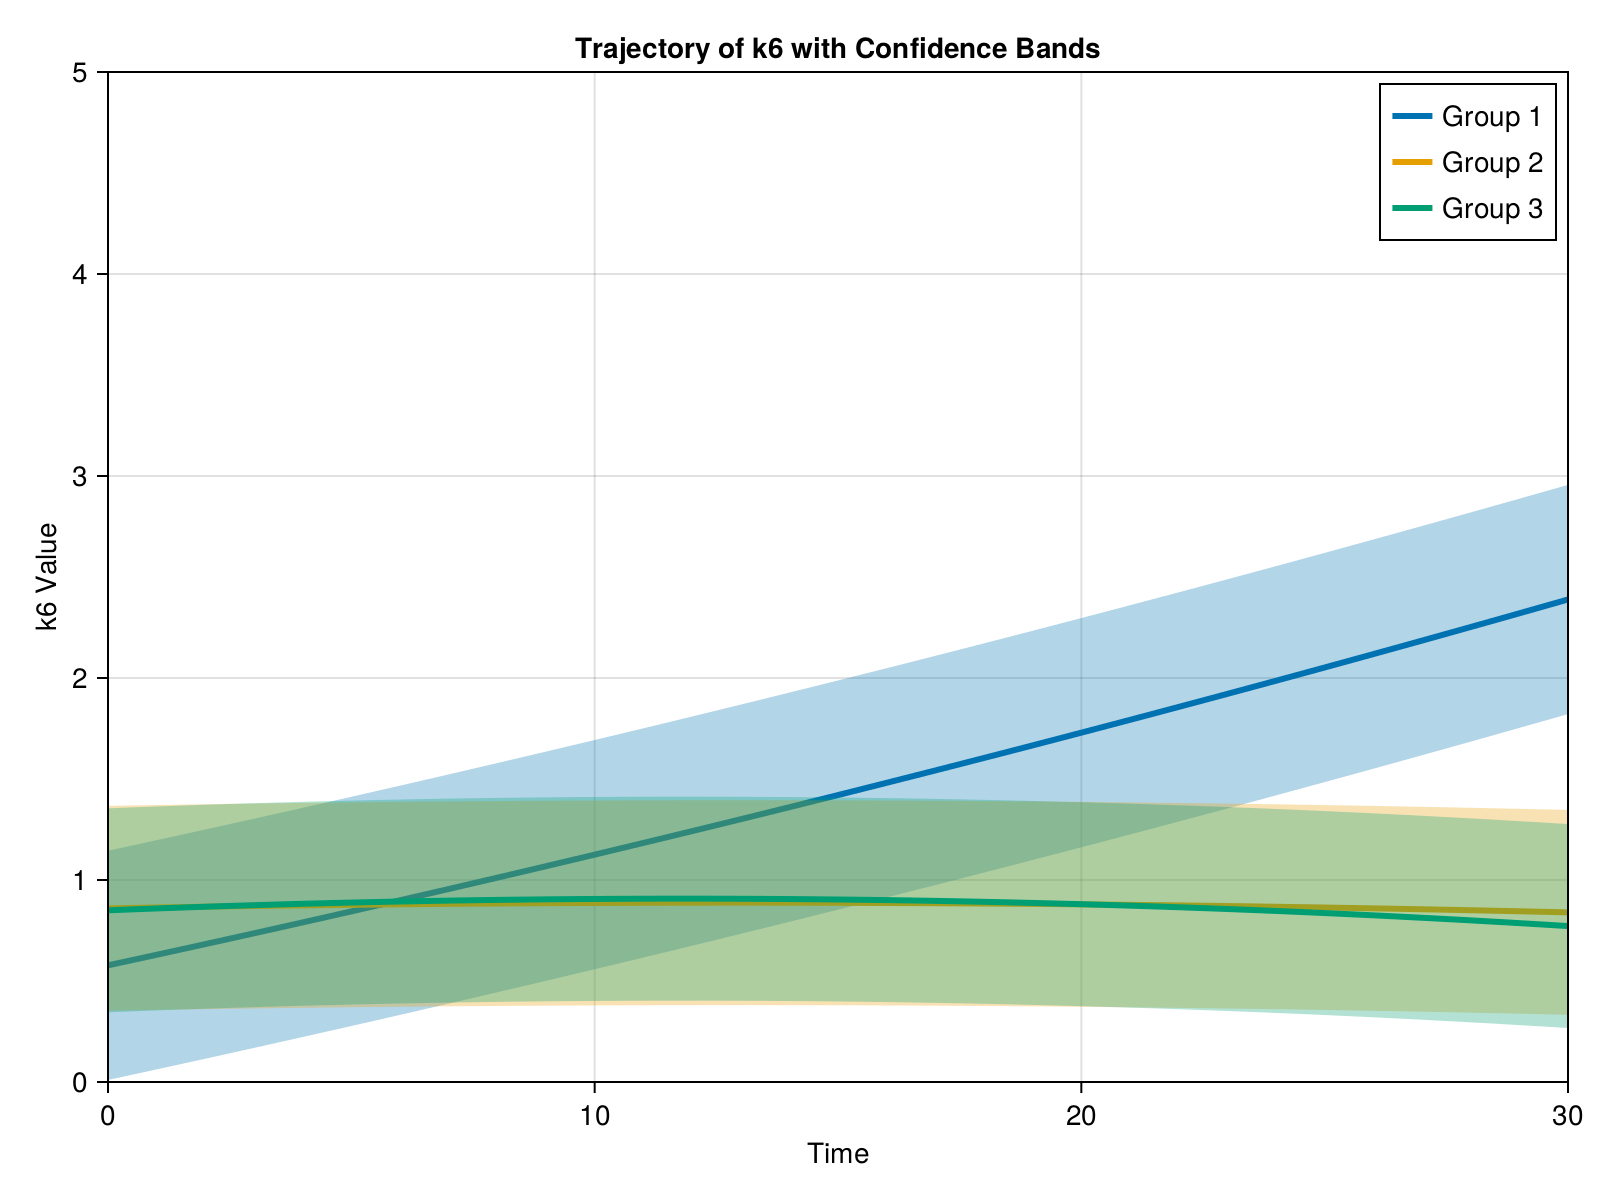

In [6]:
using CairoMakie

# Define time points
time_points = range(0, 100, length=200)

# Extract coefficients
intercepts = k6_matrix[1, :]
linear_coeffs = k6_matrix[2, :]
quadratic_coeffs = k6_matrix[3, :]
random_variances = k6_matrix[4, :]  # Assuming row 4 contains sigma2.Random
residual_variances = k6_matrix[5, :]  # Assuming row 5 contains sigma2.Residual

# Compute k6 trajectories and confidence intervals
k6_trajectories = []
upper_bounds = []
lower_bounds = []

for i in 1:3
    mean_traj = intercepts[i] .+ linear_coeffs[i] .* time_points .+ quadratic_coeffs[i] .* (time_points .^ 2)
    push!(k6_trajectories, mean_traj)

    # Compute total standard deviation
    sigma_total = sqrt(random_variances[i] + residual_variances[i])

    # Compute confidence bands (±2 std)
    push!(upper_bounds, mean_traj .+ 2 * sigma_total)
    push!(lower_bounds, mean_traj .- 2 * sigma_total)
end

# Define colors
colors = Makie.wong_colors()[1:3]

# Plot
fig = Figure(resolution=(800, 600))
ax = Axis(fig[1, 1], xlabel="Time", ylabel="k6 Value", title="Trajectory of k6 with Confidence Bands")

for i in 1:3
    band!(ax, time_points, lower_bounds[i], upper_bounds[i], color=(colors[i], 0.3))  # 30% opacity
    lines!(ax, time_points, k6_trajectories[i], color=colors[i], linewidth=3, label="Group $i")
end
ylims!(ax, 0, 5)
xlims!(ax, 0 , 30)
axislegend(ax)

fig


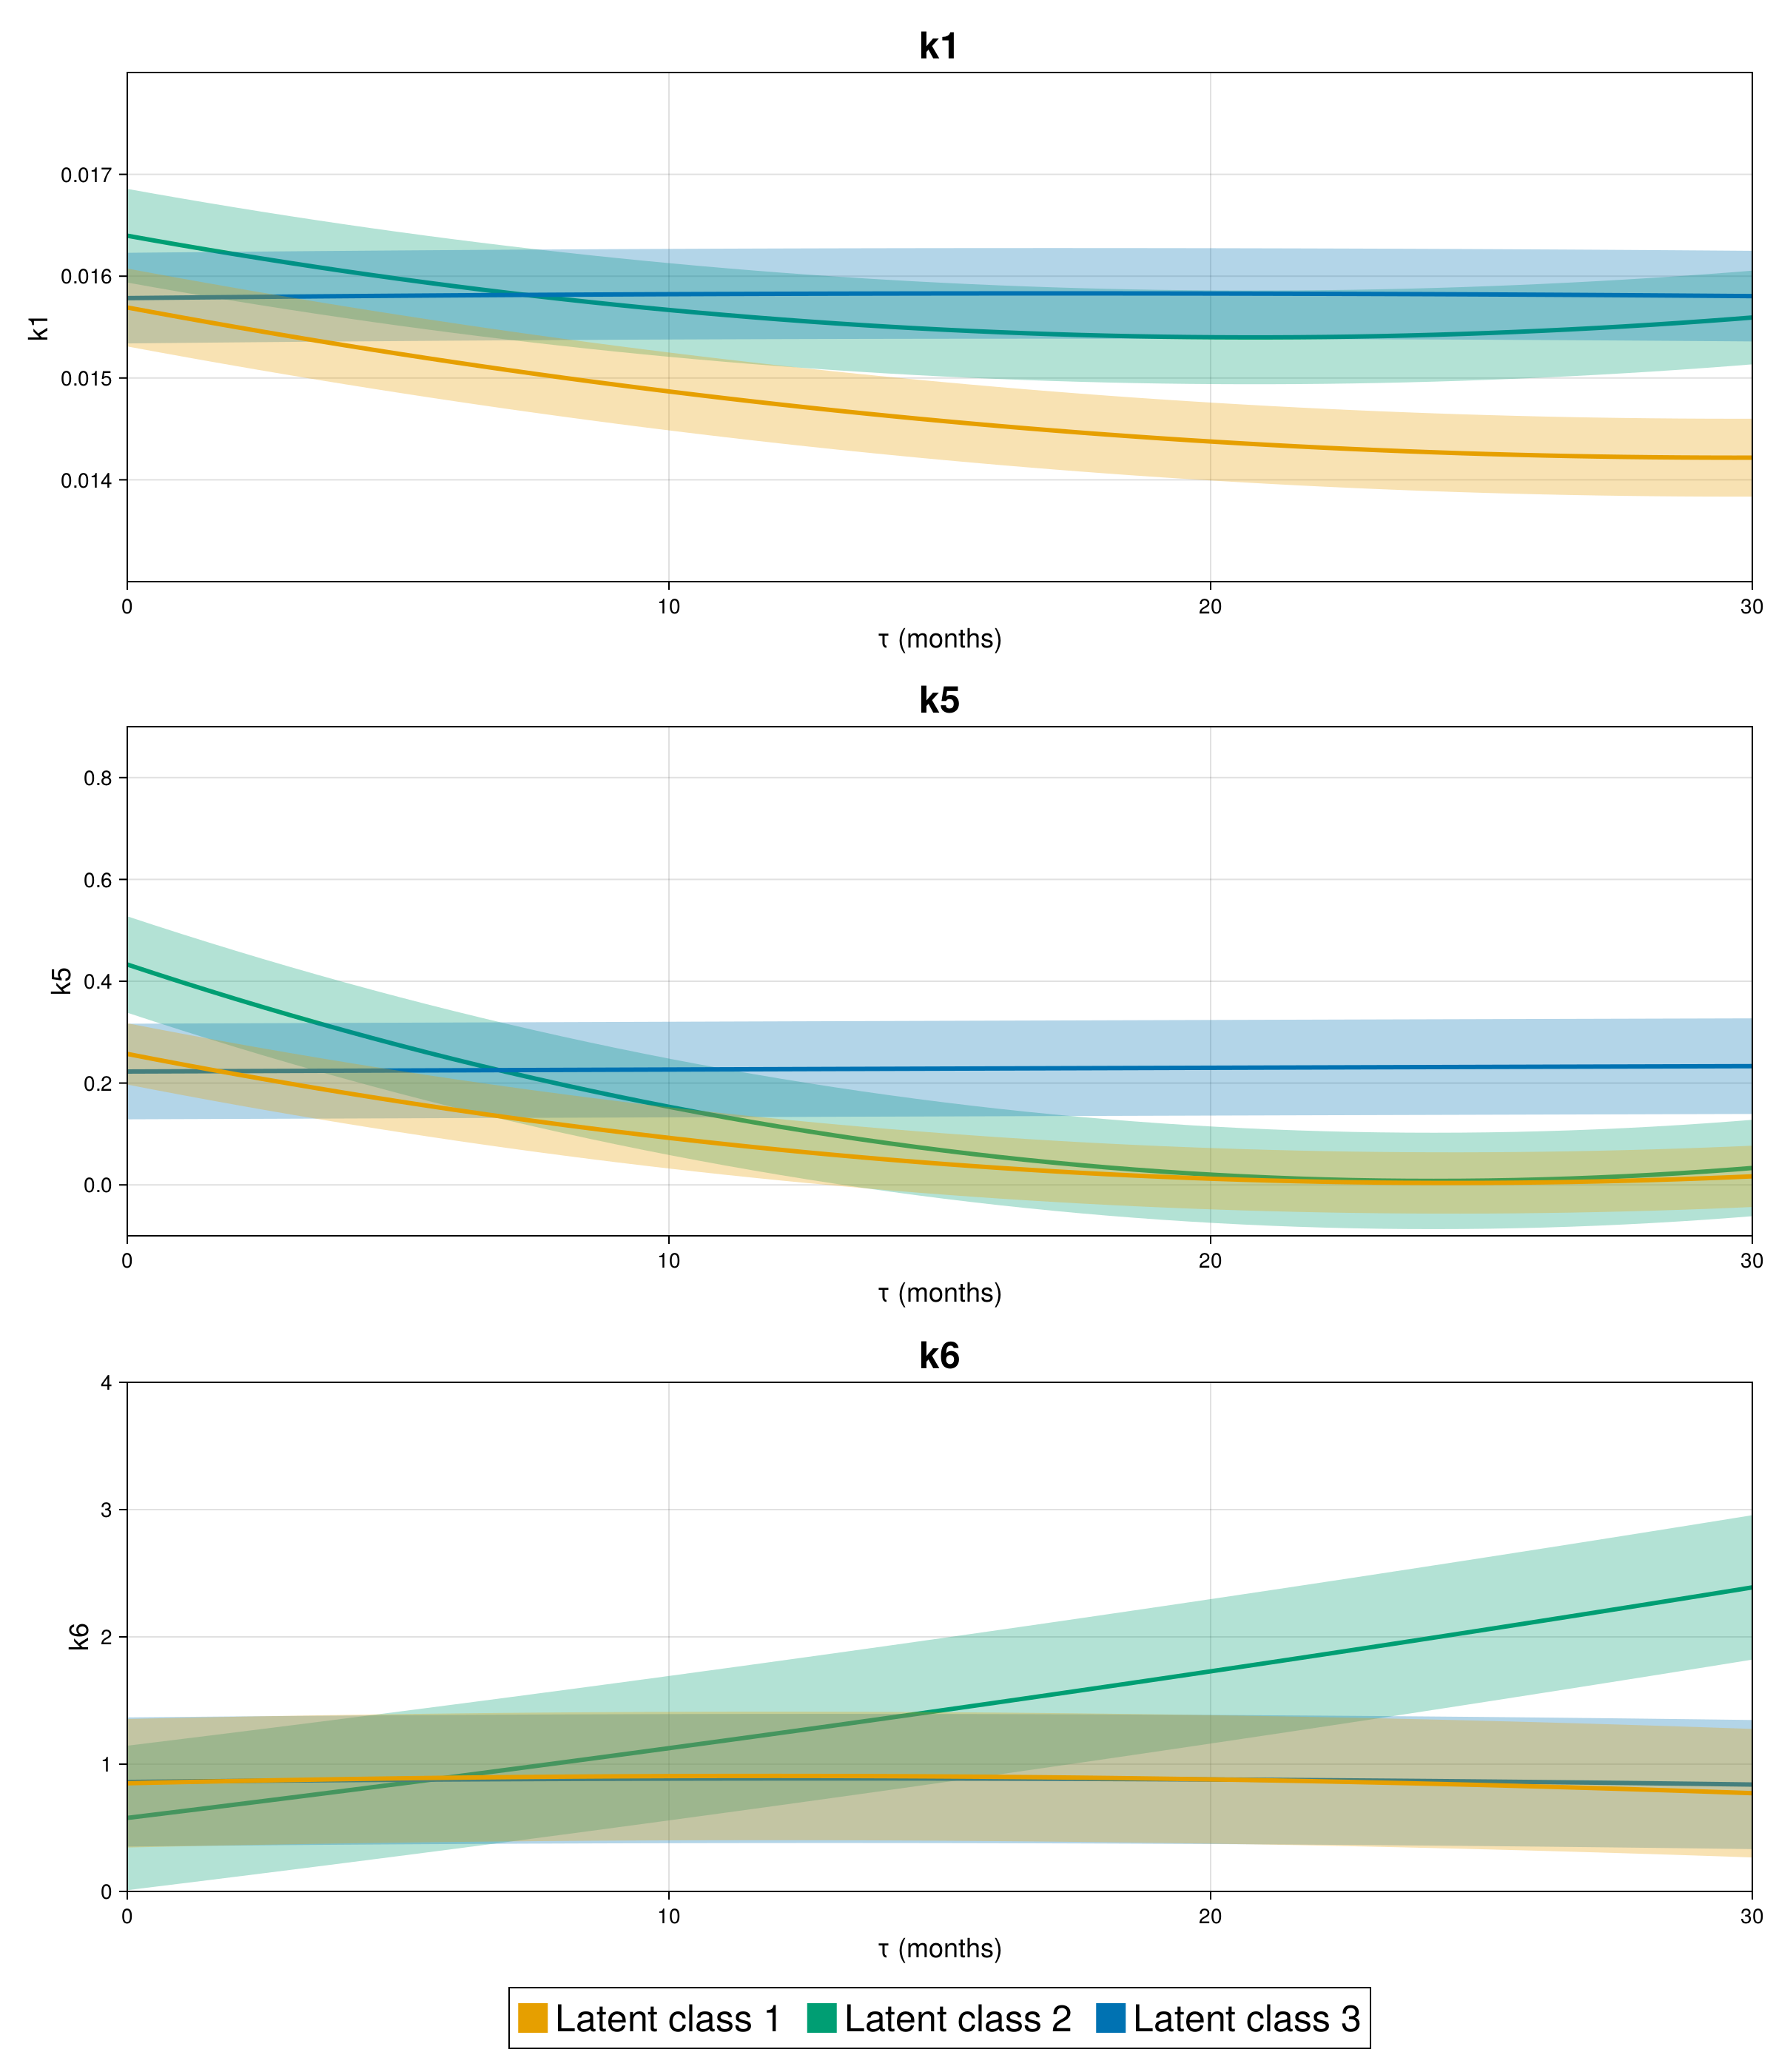

CairoMakie.Screen{IMAGE}


In [39]:
using CairoMakie

# Define time points
time_points = range(0, 100, length=200)

# Extract coefficients for k1, k5, and k6
params = ["k1", "k5", "k6"]
param_matrices = [k1_matrix, k5_matrix, k6_matrix]

# Define colors
colors = [Makie.wong_colors()[3], Makie.wong_colors()[1], Makie.wong_colors()[2]]

# Create figure with 3 vertically stacked subplots
fig = Figure(size=(1200, 1400))

for (idx, (param, param_matrix)) in enumerate(zip(params, param_matrices))
    # Extract coefficients
    intercepts = param_matrix[1, :]
    linear_coeffs = param_matrix[2, :]
    quadratic_coeffs = param_matrix[3, :]
    random_variances = param_matrix[4, :]  # Assuming row 4 contains sigma2.Random
    residual_variances = param_matrix[5, :]  # Assuming row 5 contains sigma2.Residual

    # Compute trajectories and confidence intervals
    trajectories = []
    upper_bounds = []
    lower_bounds = []

    for i in 1:3
        mean_traj = intercepts[i] .+ linear_coeffs[i] .* time_points .+ quadratic_coeffs[i] .* (time_points .^ 2)
        push!(trajectories, mean_traj)

        # Compute total standard deviation
        sigma_total = sqrt(random_variances[i] + residual_variances[i])

        # Compute confidence bands (±2 std)
        push!(upper_bounds, mean_traj .+ 2 * sigma_total)
        push!(lower_bounds, mean_traj .- 2 * sigma_total)
    end

    # Create axis for each parameter
    ax = Axis(fig[idx, 1], xlabel="τ (months)", ylabel="$param", title="$param", xlabelsize=18, ylabelsize=18, 
    xticklabelsize=14, yticklabelsize=14, titlesize = 25)




    for i in 1:3
        band!(ax, time_points, lower_bounds[i], upper_bounds[i], color=(colors[i], 0.3), alpha = 0.5)  # 30% opacity
        lines!(ax, time_points, trajectories[i], color=colors[i], linewidth=3, label="Latent class $i")
    end

    if idx == 1
        ylims!(ax, 0.013, 0.018)
    elseif idx ==2
        ylims!(ax, -0.1, 0.9)
    else
        ylims!(ax, 0,4)
    end

    xlims!(ax, 0 , 30)
end

# Add legend
Legend(fig[end+1, 1], [PolyElement(color=colors[i]) for i in [3,1,2]], ["Latent class 1", "Latent class 2", "Latent class 3"],
       orientation=:horizontal, halign=:center, labelsize=25)

# Display the figure
display(fig)

# Save the figure
save("LCTA_fit_MIRLIR.png", fig)


In [32]:
Makie.wong_colors()